In [1]:
T = BigFloat  # precision type (change here if needed)
setprecision(T, 512) #Huge precision - plenty of work could be done.

#Flat space runs with 128 bits for the BigFloat, but a normal Float64 does not seem to work.
#Higher amounts of precision are needed to see all of the ringdown.

# T=Float64;

include("FlatTimeStepExpr.jl")
include("FlatCoeffExpr.jl")
include("CosmoConstrExpr.jl")
include("cheb.jl")
include("solvers.jl")

Vfun(x) = ( -576. - 288. * x^2 - 64. * x^4 + 22. * x^6 - x^8) / 192.;
DV(x) = - x * (144. + 64. * x^2 - 33. * x^4 + 2. * x^6) / 48.;

In [2]:


Ndom = 6;
Npts = 15;
N = Ndom * Npts;
NVar = 5;
IterMax = 10;

zmin = T(0);
zmax = T(.55);

DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

DS0(t) = T(1.);
DS1(t) = T(0.);
DS2(t) = T(0.);
DS3(t) = T(0.);
DS4(t) = T(0.);

In [3]:
InitGuess = zeros(T,NVar,N);

# AHind = Int64(30);
zAH = T(0.5);
X = T(0.);
p2 = 0;
inita4 = T(-100);
tinit = T(0);
M  = T(1);
margin = 10;


In [5]:
# Computing the initial values of the fields, in particular of ξ(t_0)

X = T(0.);
Var = copy(InitGuess);
for ii in 1:500
    Var[2,1:N] = LinearSolveODE(Var, 1, inita4, X, tinit);
    Var[3,1:N] = LinearSolveODE(Var, 2, inita4, X, tinit);
    X = CorrectXi(Var, X, tinit,margin);
    print("\rX = $X")
    flush(stdout)
end

X = 1.232583437398292322034496955686772435007940251562052602636817980188077059321578091078665225025399897508775878613800637185298463734779603335498211594465738382

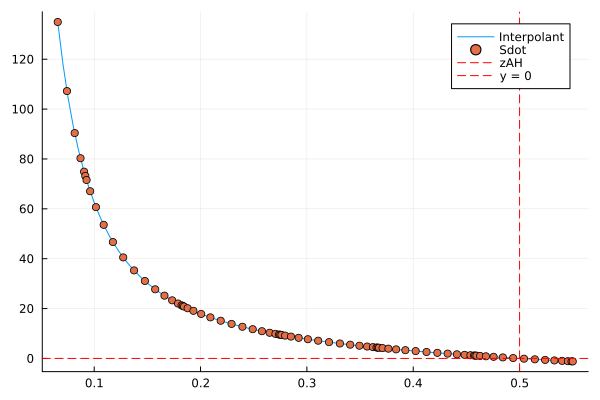

In [6]:
fig = PlotSdot(Var, X, 0,10)

In [8]:
initX = copy(X);

Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;
IterMax = 10;

zmin = T(1.e-15)
zmax = T(.5);

DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

InitGuess = zeros(T,NVar,N);
InitVar = ComputeBulk(InitGuess[1,1:N], initX, inita4,0);

In [ ]:
dt=.0002;
tinit = zero(T);

outfile = open("FlatOutputA4100.bin","w");
monitorfile = open("FlatMonitorA4100.bin","w");

VarFinal, XFinal, a4Final = Evolve(InitVar, initX, inita4, tinit ,5 , dt, 100, outfile, monitorfile)

close(outfile);
close(monitorfile);

◑ time = 5.000, constraint violation = 0.036    Time: 1:00:35

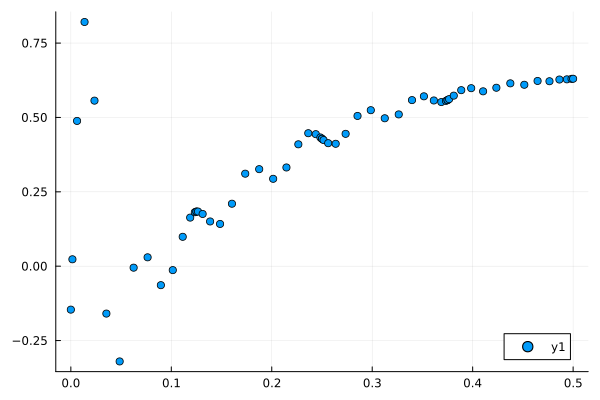

In [10]:
plt.scatter(grid,VarFinal[1,:])

In [201]:
TimeArr = [x[1][1] for x in OutputArr];
XArr = [x[2][1] for x in OutputArr];

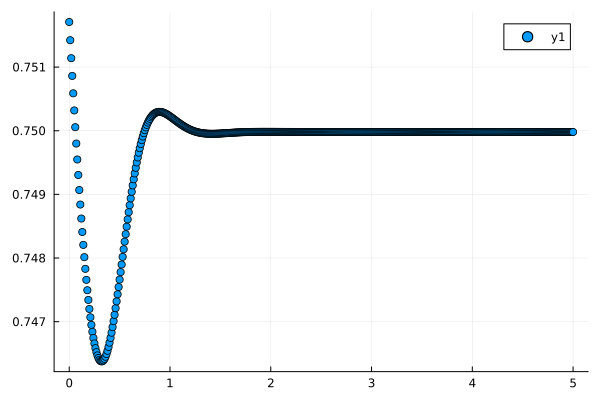

In [202]:
plt.scatter(TimeArr,XArr)

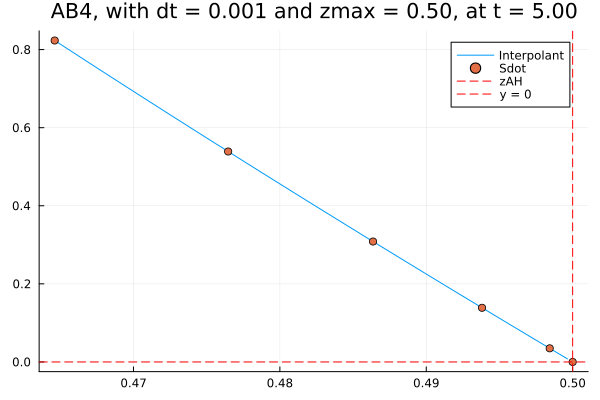

In [203]:
fig = PlotSdot(OutputArr[end][4][:,:], XArr[end], 0, 55);
plt.title!(fig,string("AB4, with dt = $dt and zmax = ",format(zmax, precision=2),", at t = ",format(TimeArr[end],precision=2)))
display(fig)

In [ ]:
# plt.savefig(fig,"RK4better.png")

In [204]:
Energy = [x[1] for x in MonitorArr];
Momentum = [x[2] for x in MonitorArr];
Operator = [x[3] for x in MonitorArr];
Constraint = [x[4] for x in MonitorArr];

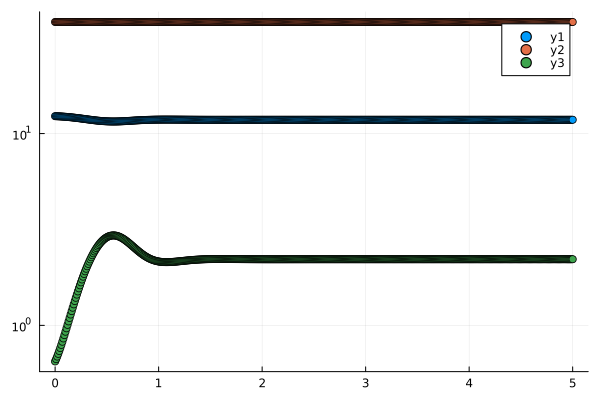

In [205]:
plt.scatter(TimeArr, Momentum, yscale = :log10)
plt.scatter!(TimeArr, Energy)
plt.scatter!(TimeArr, Operator)


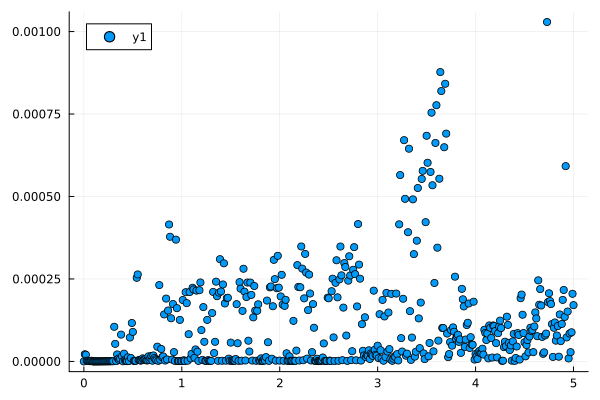

In [206]:
plt.scatter(TimeArr, Constraint)


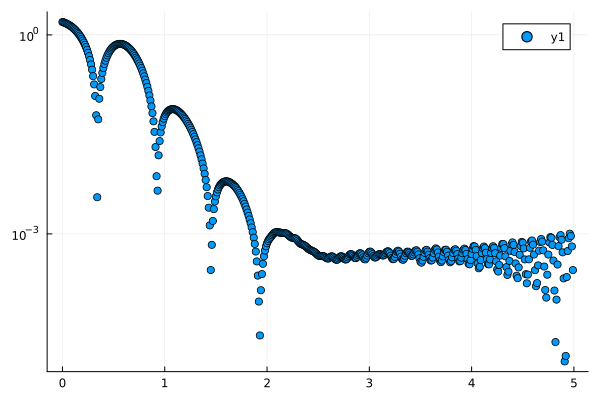

In [207]:
tmp = abs.(Operator .- Operator[end])[1:end-1];
plt.scatter(TimeArr[1:end-1],tmp, yscale=:log10 )

In [ ]:
# using Serialization

# open("flatrun.dat","w") do io
#     serialize(io, [Timearr,OutputArr, XArr, a4Arr]);
# end